<a href="https://colab.research.google.com/github/prashantgaikwad132/Cotton-Plant-Disease-Detection-and-Get-Cure-AI-APP/blob/main/Prashant_Gaikwad_Play_Store_App_Review_Analysis_Capstone_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explored and analyzed the data to discover key factors responsible for app engagement and success. </b>


 # Data Exploration :
 

In [1]:
#drive mounting for accessing dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading first dataset through google drive path
path = ('/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Play Store App Review Analysis - Prashant Gaikwad/')
df = pd.read_csv(path + 'Play Store Data.csv')

In [4]:
df.head() #gives first five rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.tail() #gives last five rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.describe() # summary of dataset

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.info() #all information regarding dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Most of the data types in dataset are objects.

In [8]:
df.shape 

(10841, 13)

Dataframe consist of 10841 rows and 13 columns

In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Features in dataset are the app name, category of the app, overall user rating of the app in play store, size of the app (in mb), total install by users, type of app like free or paid, price of app, content rating (according to age), genres, last updated date, Current version of the app available on Play Store, Minimum Android Version required to run the App.



# Data Cleaning :

### Checking missing / NaN / Null values

In [10]:
df.isnull().any() #gives columns with missing values in boolean format

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [11]:
#count the number of null values in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

So, here we can see rating contains 1474 missing values, current version contains 8 missing values, android version contains 3 missing values, type and content rating contains 1 missing value only.

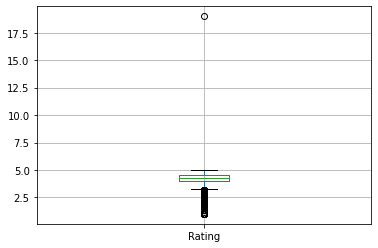

In [12]:
#plotting boxplot to find outliers in the dataset
df.boxplot() # we can see a outlier in rating feature of the app

In [13]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [14]:
# so we know that rating only have range from 1 to 5
df[df.Rating>5] #this is outlier in rating 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
#we drop this row from dataset
df.drop([10472],inplace=True)

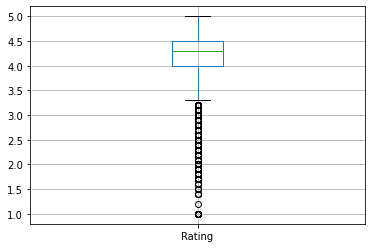

In [16]:
df.boxplot() #now there is no outlier in dataset

In [17]:
df['Rating'].fillna((df['Rating'].median()), inplace=True) #filling median value of dataframe Rating in place of missing values

In [18]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [19]:
# Fill the remaining missing categorical values with mode
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)

In [20]:
df.drop(['Current Ver','Genres','Android Ver'], axis=1, inplace=True) #dropping unnecessary columns


In [21]:
#count the number of null values in each column
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
dtype: int64

### Now Dataset is in cleaned format, and we will perform some task on dataset like changing categorial variable to numerical, replacing special characters before starting to do EDA on the dataset.

In [22]:
# Removing the special characters from the Install column 
df['Install0'] = df["Installs"].str.replace('+','')
df['Install']=df['Install0'].str.replace(',','')
#dropping all the extra columns that were created on the way
df.drop("Installs",axis=1, inplace =True)
df.drop("Install0",axis=1, inplace =True)

In [23]:
#Removing 'M' and 'K' from size column
df.Size = [x.strip().replace('M', '') for x in df.Size]
df.Size = [x.strip().replace('k', '') for x in df.Size]

Now we will convert some of the categorical variables into numerical for ease of data analysis

In [24]:
df["Reviews"]= df.Reviews.apply(lambda x: int(x))
df["Rating"]= df.Reviews.apply(lambda x: int(x))
df["Price"]= df.Price.apply(lambda x: str(x).replace("$",""))
df["Price"] = df.Price.apply(lambda x: float(x))
df["Size"] = df["Size"].apply(lambda x: float(x) if x != "Varies with device" else str(x))
df['Install']= [int(x) if x.isnumeric() else x for x in df['Install']]

In [25]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [26]:
# separating Last Updated column into 2 different columns and then dropping LAst Updated column
df[['Date','Year']] = df["Last Updated"].str.split(",",expand=True)
df.drop("Last Updated", axis=1, inplace=True)

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Install,Date,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,159,19,Free,0.0,Everyone,10000,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,967,967,14,Free,0.0,Everyone,500000,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,87510,8.7,Free,0.0,Everyone,5000000,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,215644,25,Free,0.0,Teen,50000000,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,967,2.8,Free,0.0,Everyone,100000,June 20,2018


# Exploratory Data Analysis (EDA)

#### Exploratory Data Analysis is a process of examining or understanding the data and extracting insights or main characteristics of the data.

TYPES OF EXPLORATORY DATA ANALYSIS :

Univariate Analysis - analysis of a single variable

Bivariate Analysis - analysis of exactly two variables

Multivariate Analysis - analysis of dependent variable and multiple independent variables 


In [28]:
top_cat=df.groupby('Category').size().reset_index(name='Count').nlargest(5,'Count')
top5_cat = top_cat['Category'].tolist()
data_top5 = df.groupby('Category')['Install'].agg('sum').loc[top5_cat].reset_index(name='Number_of_Installations')


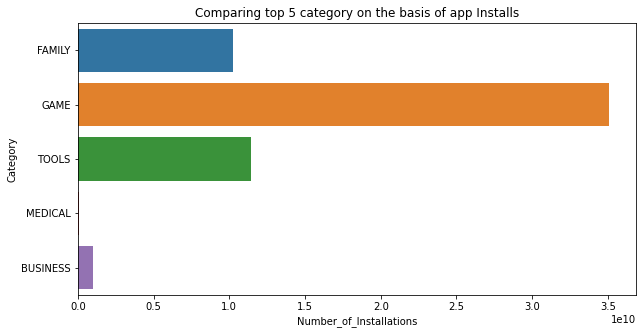

In [29]:
fig = plt.figure(figsize=(10,5))
title=plt.title('Comparing top 5 category on the basis of app Installs')
bar=sns.barplot(y=data_top5['Category'],x=data_top5['Number_of_Installations'])
plt.show(bar)

Here, we can see Game category has highest number of installations than other categories.

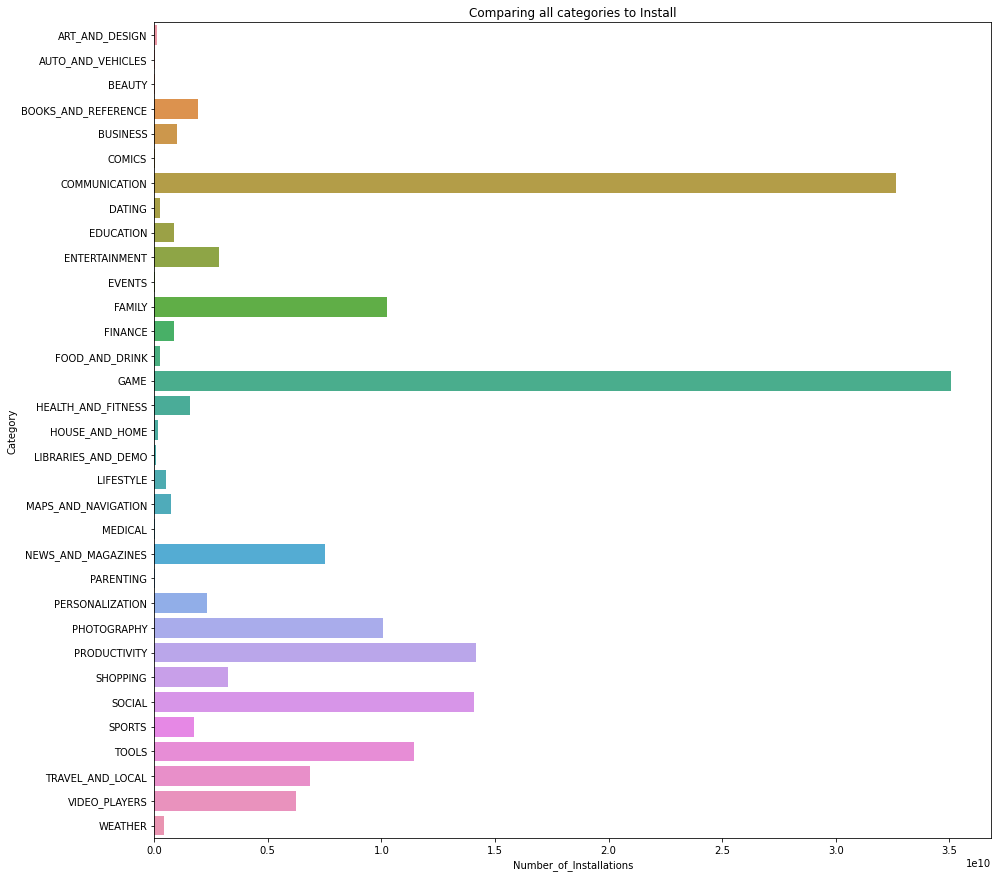

In [30]:
data =  df.groupby('Category')['Install'].agg('sum').reset_index(name='Number_of_Installations')
plt.figure(figsize=(15,15))
plt.title("Comparing all categories to Install")
sns.barplot(y=data["Category"],x=data['Number_of_Installations'])
plt.show()

Here, we can see Game category has highest number of installations than communication and other categories.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


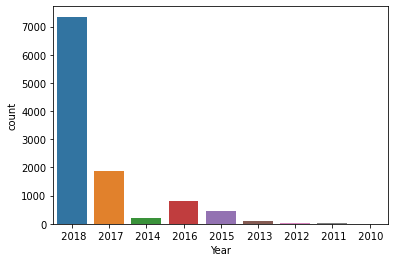

In [31]:
sns.countplot('Year',data=df)

We have given a play store app dataset of period 2010 - 2018.
But in bar plot we can notice that 2018 has highest number of apps has placed in play store.

## Content Rating On Apps
We can observe that content rating is not that matter for installation of apps,
maximum apps installations are done by everyone content and Apps that falls under the Content Rating, 'Everyone', 'Teens', 'Everyone 10+' and 'Mature 17+' has the highest chance to be downloaded. 

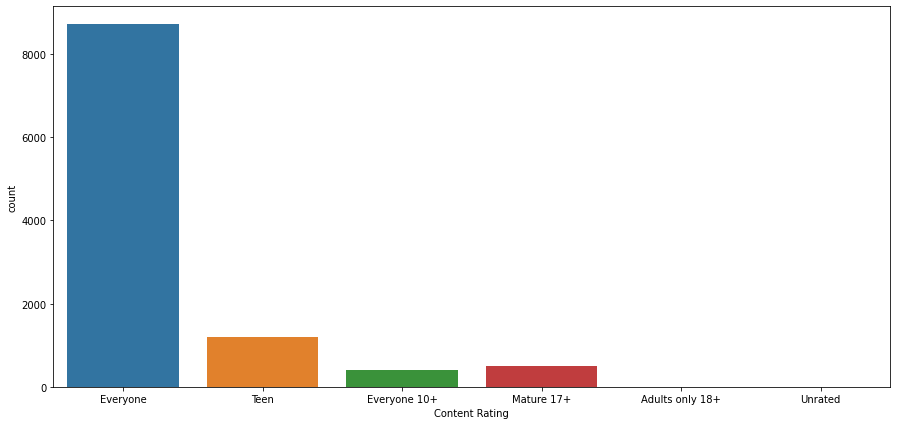

In [32]:
countplt, ax = plt.subplots(figsize = (15,7))
ax =sns.countplot(x = 'Content Rating',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


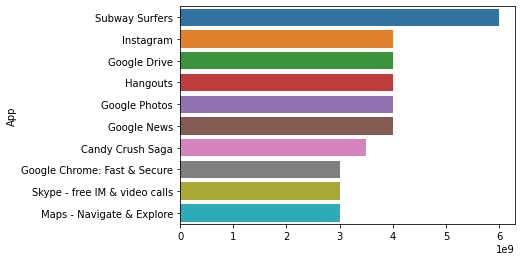

In [33]:
x= df.groupby("App").Install.sum().sort_values(ascending= False).head(10)
sns.barplot(x.values,x.index)

We can view that Subway surfer is the most downloaded app followed by Instagram, Hangouts, Google Drive, Google Photos, Google News, Candy crush saga and other apps.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


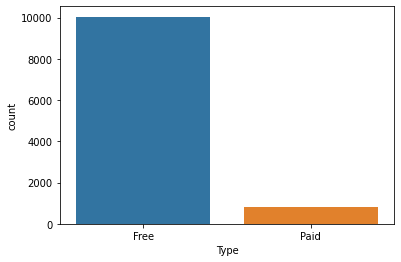

In [34]:
sns.countplot('Type',data=df)

From the bar plot, we can see that the number of Free App is absolutely overwhelming with Paid App.

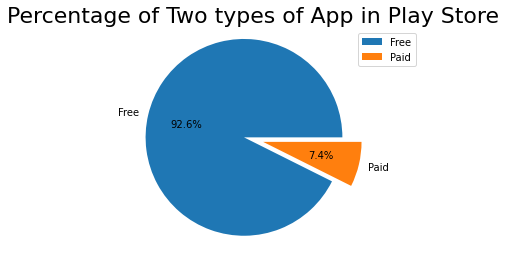

In [35]:
Types = df['Type'].value_counts(sort = True)
labels = df['Type'].value_counts(sort = True).index
explode = (0,0.2)
plt.pie(Types, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False) 
plt.axis('equal')
plt.legend(loc = 'best')
plt.title('Percentage of Two types of App in Play Store',size = 22)
plt.show()

92.6 % of the apps in the app store are free and only 7.4 % are paid apps.

# Correlation

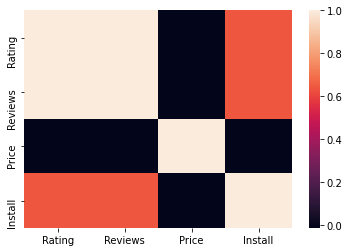

In [36]:
correlation = df.corr() 
sns.heatmap(correlation)

### We can notice that Rating and Install has good correlation,
### Reviews and Install has good correlations, and viceversa.
### Price does not have much correlation with others in datasets.

In [37]:
correlation

,Rating,Reviews,Price,Install
Rating,1.000000,1.000000,-0.009667,0.643122
Reviews,1.000000,1.000000,-0.009667,0.643122
Price,-0.009667,-0.009667,1.000000,-0.011689
Install,0.643122,0.643122,-0.011689,1.000000


In [38]:
#read second dataset through google drive path
path2 = ('/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Play Store App Review Analysis - Prashant Gaikwad/')
df2 = pd.read_csv(path + 'User Reviews.csv')

In [39]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [40]:
df2.shape

(64295, 5)

There are 64295 rows and 5 columns

In [41]:
#checking missing values
df2.isnull().any()

App                       False
Translated_Review          True
Sentiment                  True
Sentiment_Polarity         True
Sentiment_Subjectivity     True
dtype: bool

In [42]:
df2.isnull().sum() #count of missing values

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [43]:
df2 = df2.dropna() #dropping all null value rows

In [44]:
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [45]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [46]:
df2.shape

(37427, 5)

In [47]:
df_cpy = df.copy()
merged_df = pd.merge(df_cpy, df2, on ="App", how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

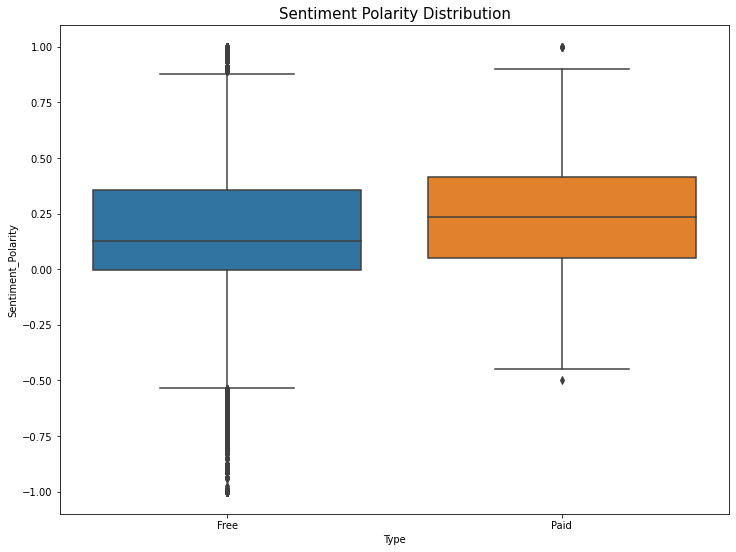

In [48]:
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
title = ax.set_title('Sentiment Polarity Distribution',fontsize =15)

### From above box plot we can note that, Paid Apps have less unsatisfied than Free App from the user reviews.

# Conclusion

### So we have done lots of EDA on Play Store App dataset, now we'll conclude some inferences:

1) The Rating and Review have a high impact on app installations.

2) The app that is free of cost is a high chance of being downloaded.

3) Game category has the highest number of installations than other categories.

4) Apps that falls under the Content Rating: 'Everyone', 'Teens', 'Everyone 10+' and 'Mature 17+' have the highest chance of being downloaded.

5) The Subway surfer is the most downloaded app followed by the Instagram, Hangouts, Google Drive, Google Photos, Google News, Candy crush saga and other apps.

6) 92.6 % of the apps in the app store are free and only 7.4 % are paid apps.

7) Price does not have much correlation with others in datasets.

8) Rating and Reviews are correlated with the Installation of apps.

9) In Sentiment Polarity Distribution, many Free Apps are recorded in extremely low results but Paid App only has one outside the lowest.

10) In last, Free App can probably earn more profit than Paid App by placing Ads inside their apps for additional Ads income.